Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,469 (68.38 MB)

 Trainable params: 3,211,779 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

[np.int64(3), np.int64(59), np.int64(74), np.int64(104)]
200/200 ━━━━━━━━━━━━━━━━━━━━ 680s 3s/step - Score: 5589.8042 - TotalVariation2D: 0.1868 - Norm: 0.0162


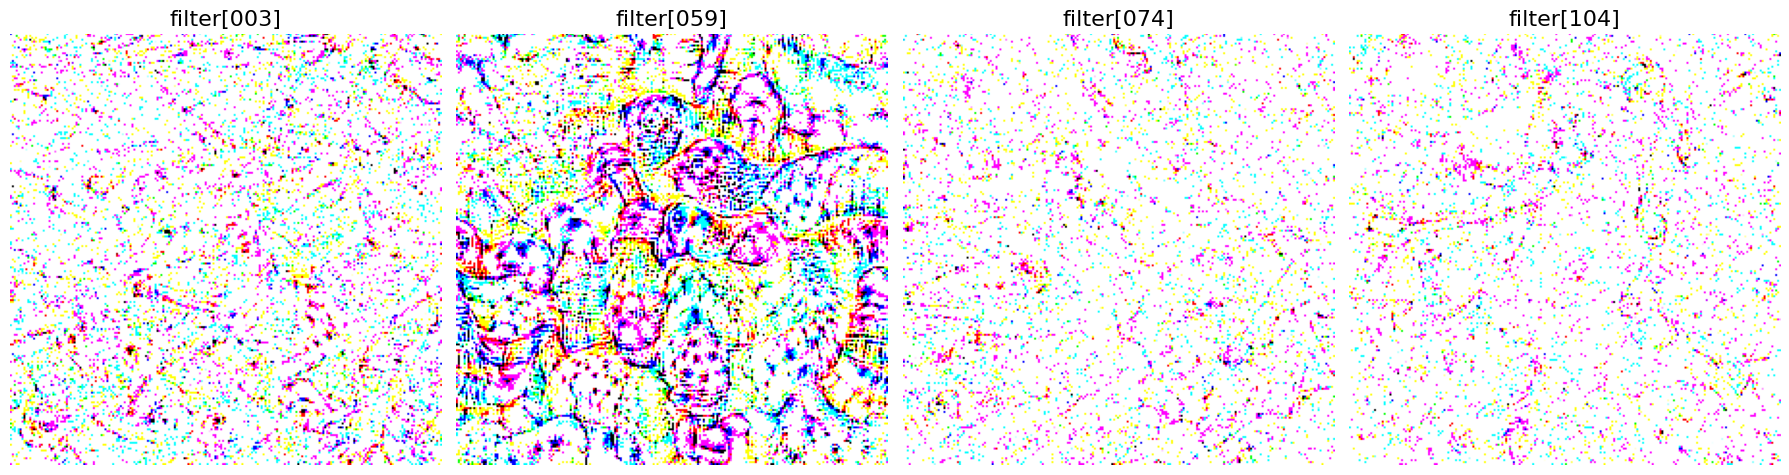

AttributeError: 'Sequential' object has no attribute 'output_names'

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D



your_model_path = 'C:/Users/Asus/Desktop/progetto/saved_model/modello.h5' #update this variable with the exact path where your model is stored
model = models.load_model(your_model_path)
model.summary()



# The target layer
layer_name = 'dense'





# Number of filters to display (rows * cols)
rows = 1
cols = 4

# This instance constructs new model whose output is replaced to the selected layer's output.
extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)

# This instance modify the model's last activation function to linear one.
replace2linear = ReplaceToLinear()

filter_numbers = sorted(list(np.random.choice(range(model.get_layer(name=layer_name).output.shape[-1]),rows*cols,replace=False)))
print(filter_numbers)

scores = CategoricalScore(filter_numbers)

# Define seed inputs whose shape is (samples, height, width, channels).
seed_input = tf.random.uniform((len(filter_numbers), 224, 224, 3), 0, 255)

activation_maximization = ActivationMaximization(model, model_modifier=[extract_intermediate_layer, replace2linear], clone=False)

# Generate maximized activation
activations = activation_maximization(scores,
                                      seed_input=seed_input,
                                      callbacks=[Progress()],steps=steps,training=False,
                                      regularizers=regularizers,
                                      input_modifiers =input_modifiers)

axes=[]
fig=plt.figure(figsize=(18, 8))

for i,j in enumerate(filter_numbers):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=("Filter "+str(j))
    axes[-1].set_title('filter[{:03d}]'.format(j), fontsize=16)  
    axes[-1].imshow(activations[i]) 
    axes[-1].axis('off') 
fig.tight_layout()    
plt.show()

# The target layer n°5
layer_name = 'dropout' 

# Best Parameters for the layer conv2d_5


# The target layer n°10
layer_name = 'dense_1' 




# Classes
selected_classes = ['abstract', 'color_field_painting', 'cubism', 'expressionism', 'impressionism','realism', 'renaissance', 'romanticism']

# Params
steps = 2048
regularizers=[TotalVariation2D(weight=0.001),Norm(weight=0.01, p=2)]
input_modifiers = [Jitter(jitter=32)]


CLASS_NAMES = ['abstract', 'color_field_painting', 'cubism', 'expressionism', 'impressionism','realism', 'renaissance', 'romanticism']
ind = [np.argmax(np.array(CLASS_NAMES) == i) for i in selected_classes]
score = CategoricalScore(ind)

replace2linear = ReplaceToLinear()
activation_maximization = ActivationMaximization(model, model_modifier=replace2linear, clone=True)

seed_input = tf.random.uniform((len(ind), 224, 224, 3), 0, 255)

# Generate maximized activation
activations = activation_maximization(score,
                                      seed_input = seed_input,
                                      callbacks=[Progress()],steps=steps,training=False,
                                      regularizers = regularizers,
                                      input_modifiers = input_modifiers)



# Render
f, ax = plt.subplots(nrows=1, ncols=len(ind), figsize=(18, 10))
for i, title in enumerate(np.array(CLASS_NAMES)[ind]):
    ax[i].set_title(title, fontsize=12)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()